In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

Open csv files and concatenate them into single csv file

In [2]:
path = "./Sales_Data/"
files = [file for file in os.listdir(path)]

all_months = pd.DataFrame()

for file in files:
    df = pd.read_csv(path+file)
    all_months = pd.concat([all_months, df])
    
all_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


Find and delete missing values

In [3]:
all_months_na = all_months.dropna(how = 'any')

print("Old data frame length:", len(all_months), "\nNew data frame length:", 
       len(all_months_na), "\nNumber of rows with at least 1 NA value: ",
       (len(all_months)-len(all_months_na)))

Old data frame length: 186850 
New data frame length: 186305 
Number of rows with at least 1 NA value:  545


Delete duplicated headers

In [4]:
all_months_na = all_months_na[all_months_na.Product != "Product"]

print(len(all_months_na))

185950


Save to csv and import saved file as dataframe

In [5]:
all_months_na.to_csv("all_months.csv", index=False)
df = pd.read_csv("all_months.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Check datatypes and correct them

In [6]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [7]:
df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

Convert Order Date to datetime object

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

In [9]:
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

Add column Total = Quantity Ordered * Price Each

In [10]:
df['Total'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95


Which month had the largest amount of total sales in USD?

In [11]:
#add Month column

df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df.groupby(['Month']).sum()

,Order ID,Quantity Ordered,Price Each,Total
Month,,,,
1,1421630798,10903,1811768.38,1822256.73
2,1871052592,13449,2188884.72,2202022.42
3,2564810956,17005,2791207.83,2807100.38
4,3387347100,20558,3367671.02,3390670.24
5,3345871523,18667,3135125.13,3152606.75
6,2932976072,15253,2562025.61,2577802.26
7,3284139576,16072,2632539.56,2647775.76
8,2899373917,13448,2230345.42,2244467.88
9,2948726831,13109,2084992.09,2097560.13


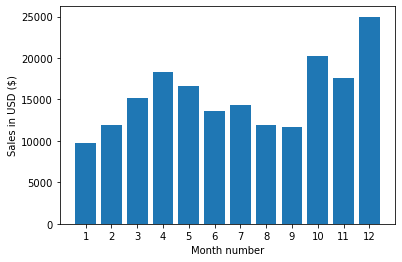

In [14]:
#plot the results
keys = [month for month, df in df.groupby(['Month'])]

plt.bar(keys, df.groupby(['Month']).count()['Total'])
plt.xticks(keys)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

What city sold the most products?

In [15]:
#add city + state column

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA)


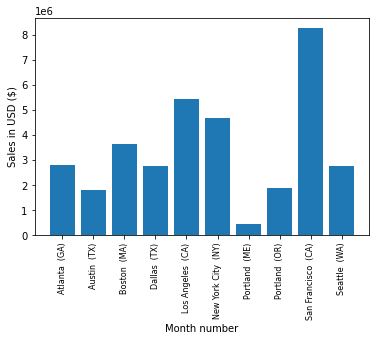

In [16]:
keys = [city for city, df in df.groupby(['City'])]

plt.bar(keys,df.groupby(['City']).sum()['Total'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

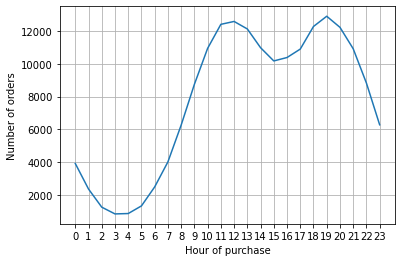

In [19]:
keys = [hour for hour, df in df.groupby(['Hour'])]

plt.plot(keys,df.groupby(['Hour']).count()['Order ID'])
plt.xlabel('Hour of purchase')
plt.ylabel('Number of orders')
plt.xticks(keys)
plt.grid()
plt.show()

What products are most often sold together?

In [44]:
df_duplicated = df[df['Order ID'].duplicated(keep=False)]
df_duplicated['Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_duplicated2 = df_duplicated[['Order ID', 'Grouped']].drop_duplicates()

df_duplicated2.head(100)

/tmp/ipykernel_31328/544115801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated['Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2287,297847,"iPhone,Lightning Charging Cable"
2335,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2337,297895,"USB-C Charging Cable,27in FHD Monitor"
2388,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [49]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_duplicated2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What product sold the most?

In [50]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,Month,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City (NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta (GA),12


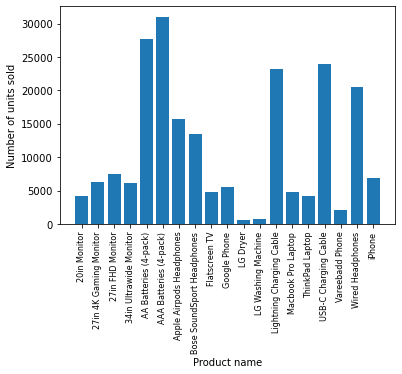

In [53]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [product for product, df in product_group]

plt.bar(keys, quantity_ordered)
plt.ylabel('Number of units sold')
plt.xlabel('Product name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [54]:
prices = df.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/tmp/ipykernel_31328/2212735591.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
/tmp/ipykernel_31328/2212735591.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


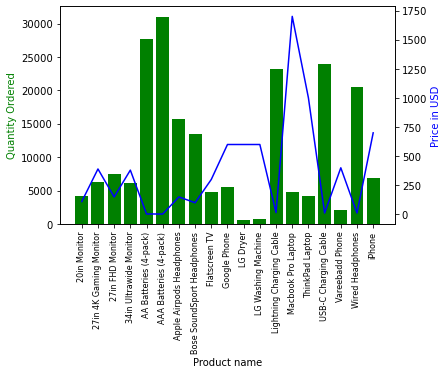

In [63]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in USD', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)
fig.show()